#### 1.

Przypomnij sobie z wykładu i ewentualnie z wcześniejszych przedmiotów, jakie są cele i zastosowania algorytmów tworzenia skupień. Zapisz odpowiedź poniżej (ta część tego pytania nie jest oceniana).

Przeanalizuj dokładnie rozdział 2.3.1 z dokumentacji scikit. Patrząc na macierz obrazków odpowiedz na pytanie: mając dany rozkład obserwacji (wiersze), jak chciał(a)bym żeby zachował się idealny algorytm wykrywania skupień? Możesz zacząć od ostatniego wiersza (tam, gdzie mamy równomierny rozkład obserwacji) i eliminować algorytmy, które nie spełniają Twoich kryteriów. Pamiętaj jednak, że większość z nich wymaga podania parametrów (tabela pod rysunkami), i te parametry niekoniecznie zostały najlepiej dostosowane do konkretnego rozkładu przypadków. Opisz swoje wnioski z analizy tej macierzy obrazków.

Cele i zastosowania (nieoceniane): 

Cele algorytmów tworzenia skupień to przede wszystkim wykrywanie naturalnych grup w danych bez znajomości etykiet, co pozwala lepiej zrozumieć strukturę zbioru, znaleźć wzorce, segmentować użytkowników czy przygotować dane do dalszej analizy. W praktyce stosuje się je m.in. do segmentacji klientów, analizy obrazów, eksploracji danych czy wykrywania anomalii.

Na poszczególnych danych (wiersze): pochwała i krytyka algorytmów dostępnych w scikit oraz jak powinien działać idealny algorytm: 

Idealny algorytm powinien poprawnie rozdzielać skupienia niezależnie od ich kształtu, rozmiaru i gęstości oraz być odporny na szum i wartości odstające. Widać jednak, że nie ma jednego uniwersalnego rozwiązania: KMeans dobrze radzi sobie z kulistymi skupieniami, DBSCAN wykrywa skupienia o nieregularnych kształtach i ignoruje szum, a Spectral Clustering lepiej rozdziela skupienia nieliniowe. Gdy dane są rozłożone równomiernie, idealny algorytm nie powinien tworzyć sztucznych skupień. Ostatecznie wybór metody i parametrów zależy od charakterystyki danych i oczekiwanego efektu, a każdy algorytm ma swoje mocne i słabe strony widoczne na macierzy obrazków.

#### 2.

Pobierz plik o nazwie odpowiadającej Twojemu numerowi albumu. Nasze dane wyjściowe to 12 głosek, wypowiedzianych – dla głosek, dla których to ma sens – w 4 różnych wysokościach (przykład tutaj). Ze środka każdej głoski (których jest 12*4) wybieramy krótką porcję próbek (np. 256, około 1/200 sekundy) i z tej porcji wyznaczamy moc poszczególnych częstotliwości za pomocą FFT. To, co mamy w pliku jako atrybuty warunkowe, to właśnie amplitudy poszczególnych częstotliwości (podgląd). Ostatnia kolumna to atrybut (liczba) niosący informację o tym, której wysokości i której głoski dotyczy dany wiersz. W tym atrybucie setki (100, 200, 300, 400) mówią o wysokości wypowiedzi (1, 2, 3, 4), natomiast reszta liczby mówi o numerze głoski (0-11).

Zatem zamiana tej liczby (etykiety, atrybutu "decyzyjnego") na znak odpowiadający głosce wygląda tak:

    GLOSKI = "a-e-i-o-u-y-sz-z-ź-ż-g-r".split('-')
    data = np.genfromtxt('data.txt', delimiter='\t')
    print(data.shape)
    X = data[:,:-1]
    print(X.shape)
    y = data[:,-1].astype(int)
    etykiety = [GLOSKI[nr%100]+str(nr//100) for nr in y]  # ['a1', 'e1', 'i1', .., 'r1', 'a2', 'e2', .., 'r4']
Zanim jeszcze wykonasz jakiekolwiek eksperymenty obliczeniowe, zastanów się dokładnie nad oczekiwanym rezultatem. Wiedza dotycząca przetwarzania dźwięku i głosu, rozpoznawania mowy, komunikacji człowiek-komputer może tu pomóc.

Jakiego rozkładu tych 12*4 przypadków w przestrzeni atrybutów warunkowych się spodziewamy? Które przypadki będą bliżej siebie, a które dalej w przestrzeni amplitud częstotliwości? Jak (o ile w ogóle) pogrupują się przypadki?

Jak myślisz, które głoski mogą okazać się trudne do przydzielenia do konkretnych skupisk dlatego, że mogą być "pomiędzy" różnymi głoskami albo mogą przypominać raz takie, raz inne głoski – w zależności od tego, w które miejsce sygnału trafimy wybierając jego króciutki fragment?

Myślę, że w przestrzeni atrybutów warunkowych przypadki pogrupują się według typu głoski, bo każda głoska ma charakterystyczny rozkład widma, ale mogą też pojawić się podgrupy związane z wysokością dźwięku, zwłaszcza dla samogłosek. Przypadki tej samej głoski, ale o różnych wysokościach, mogą być do siebie dość podobne, choć różnice w wysokości mogą powodować lekkie przesunięcia w widmie. Najbliżej siebie będą głoski o podobnym brzmieniu, np. samogłoski lub spółgłoski dźwięczne, a dalej – głoski o zupełnie innym charakterze akustycznym. Trudne mogą być do rozdzielenia głoski, które mają zbliżone widma, np. 'z', 'ż', 'ź', albo takie, które w zależności od fragmentu sygnału mogą przypominać inne, np. 'g' i 'r' lub 'sz' i 'ż'. Dodatkowo, jeśli fragment sygnału trafi na przejście między dźwiękami lub na mniej charakterystyczny moment artykulacji, przypadek może być trudny do jednoznacznego przypisania do skupiska.

#### 3.

Ponieważ mamy kilkadziesiąt wymiarów (atrybutów warunkowych), chcielibyśmy coś powiedzieć o tych danych bez ich poważnego transformowania. Dlatego zwizualizuj przypadki za pomocą PCA w dwóch wymiarach; załącz obrazek i podaj zachowany po transformacji do 2D procent wariancji. Oczywiście podczas transformacji nie używaj atrybutu "decyzyjnego", jednak użyj go po to, żeby dodać etykiety do przypadków uzyskując efekt podobny jak poniżej:


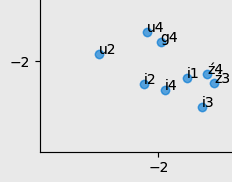

Może przydać się fragment kodu:

   plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5)
   for i,pair in enumerate(X_reduced):
      ax.text(pair[0], pair[1], etykiety[i])
Czy Twoje wcześniejsze przewidywania co do rozkładu przypadków w przestrzeni i ewentualnej trudności niektórych głosek sprawdziły się, czy nie? Dlaczego? Czy transformacja do 2D (lub 3D, jeśli wolisz) pozwala nam z zadowalającym przekonaniem wnioskować o tym, jak wygląda oryginalna przestrzeń?

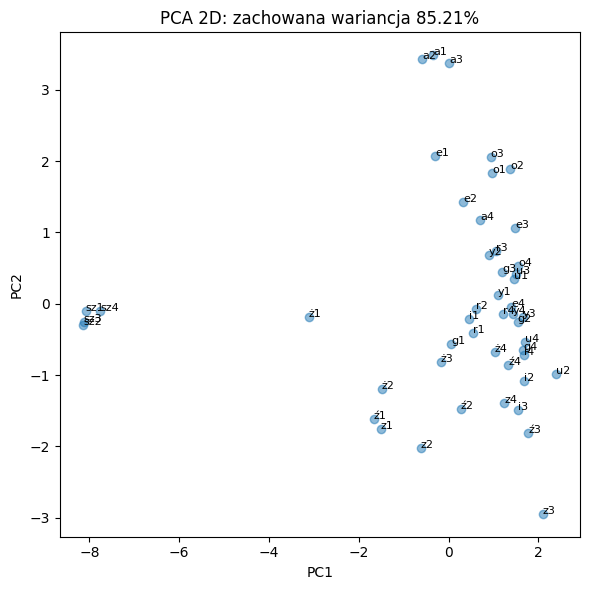

Zachowany procent wariancji po PCA do 2D: 85.21%


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Wczytanie danych
GLOSKI = "a-e-i-o-u-y-sz-z-ź-ż-g-r".split('-')
data = np.genfromtxt('162961-clustersel.txt', delimiter='\t')
X = data[:,:-1]
y = data[:,-1].astype(int)
etykiety = [GLOSKI[nr%100]+str(nr//100) for nr in y]

# PCA do 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
var2d = np.sum(pca.explained_variance_ratio_)

plt.figure(figsize=(6,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], alpha=0.5)
for i, pair in enumerate(X_reduced):
    plt.text(pair[0], pair[1], etykiety[i], fontsize=8)
plt.title(f'PCA 2D: zachowana wariancja {var2d*100:.2f}%')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

print(f'Zachowany procent wariancji po PCA do 2D: {var2d*100:.2f}%')

#### 4.

Ponieważ wiemy już co nieco o tym, jak rozmieszczone są przypadki w przestrzeni, pora na kolejną (nieocenianą) hipotezę. Mamy 12 głosek w 4 wysokościach wypowiedzi.

Powiedzmy, że mamy wiedzę a priori o tym, że głosek w zbiorze próbek dźwiękowych jest 12, więc postanawiamy szukać właśnie k=12 skupień (w oryginalnej przestrzeni atrybutów, a nie po redukcji PCA). Jak uważasz, jak zachowa się k-means: czy 12 skupień będzie odpowiadało poszczególnym głoskom?
A jeśli postawimy sobie za cel znaleźć k=2 duże skupienia: samogłoski i spółgłoski, to jak myślisz, jaki będzie efekt? Czy odkryte skupiska będą odpowiadały faktycznym podziałom przypadków na samogłoski i spółgłoski, tak, jak to wskazuje klasa z atrybutu decyzyjnego?
A jeśli bazując na wiedzy a priori o 4 wysokościach wypowiedzi ustawimy k=4, to czy odkryte skupiska odzwierciedlą 4 wysokości wypowiedzi?

Dla k=12 algorytm k-means odkryje skupiska nie do końca odpowiadające poszczególnym głoskom, ponieważ niektóre głoski mają podobne widma i mogą zostać połączone w jedno skupisko, a inne – bardziej zróżnicowane – mogą zostać rozdzielone na kilka skupień. K-means preferuje skupiska kuliste i o podobnej liczności, więc niekoniecznie odzwierciedli rzeczywisty podział na 12 głosek.

Dla k=2 algorytm k-means raczej nie odkryje skupisk odpowiadających dokładnie samogłoskom i spółgłoskom, ponieważ różnice między tymi grupami nie muszą być dominujące w przestrzeni cech – niektóre spółgłoski mogą być bliżej samogłosek niż innych spółgłosek. Skupiska mogą być podzielone według innych cech, np. energii lub wysokości, a nie zgodnie z podziałem lingwistycznym.

Dla k=4 algorytm k-means prawdopodobnie nie odkryje skupisk odpowiadających 4 wysokościom wypowiedzi, ponieważ różnice wysokości wpływają na widmo, ale nie są jedynym czynnikiem różnicującym przypadki. Skupiska mogą być mieszane – przypadki o różnych wysokościach, ale podobnych widmach, mogą trafić do tego samego skupiska. K-means nie jest w stanie wyodrębnić wysokości, jeśli nie jest to główny czynnik różnicujący dane.

#### 5.

Pora na weryfikację hipotez dla k=12, 4 i 2. Użyj k-means i uzyskane centroidy pokaż czerwonymi krzyżykami w tej samej przestrzeni 2D (ewentualnie 3D, jeśli wolisz), która została wytworzona przez PCA. Zaznacz w jakiś sposób (np. ten sam kolor lub etykieta) obserwacje należące do tych samych skupisk (bazując oczywiście na oryginalnej przestrzeni atrybutów).

```python
   k_means = KMeans(init='k-means++', n_clusters=12, n_init=10)
   k_means.fit(X)
   clustercenters_trans = pca.transform(uzyskane_wspolrzedne_centroidow_kmeans)
   print('kmeans:',clustercenters_trans.shape)  # kontrola tego, że centroidy trafiły do zredukowanej przez PCA przestrzeni
   ax.scatter(clustercenters_trans[:,0], clustercenters_trans[:,1], marker='x', color='red')
   # TODO Zaznacz w jakiś sposób (np. kolor lub etykieta) obserwacje należące do tych samych skupisk
   #      (bazując na oryginalnej przestrzeni atrybutów).
```

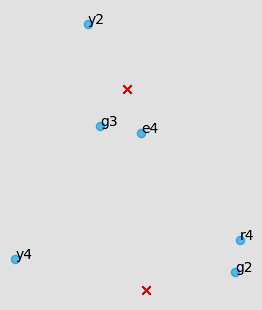

W odpowiedzi załącz wizualizacje.
Czy Twoje hipotezy się sprawdziły?
Co jest odpowiedzialne za to, że przypadki nie grupują się idealnie wedle głosek (12), wysokości wypowiedzi (4) oraz podziału na samo/spółgłoski (2), a centroidy nie trafiają idealne w środki ładnych, odseparowanych od siebie skupisk?
Używanie surowych wartości amplitud jest niezgodne z percepcją głośności człowieka. Zlogarytmuj wszystkie amplitudy w zbiorze i wygeneruj znów wizualizacje k-means. Opisz różnice. Jeśli uważasz, że tak zdefiniowane atrybuty (tzn. po zlogarytmowaniu) są bardziej uzasadnione, używaj ich w dalszych pytaniach.

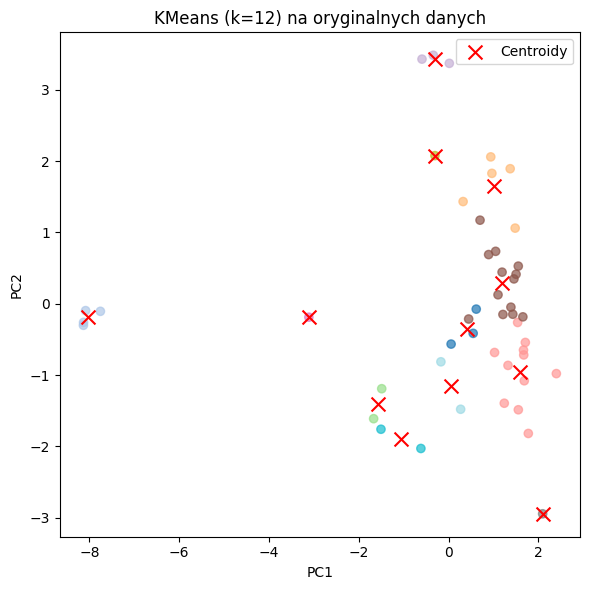

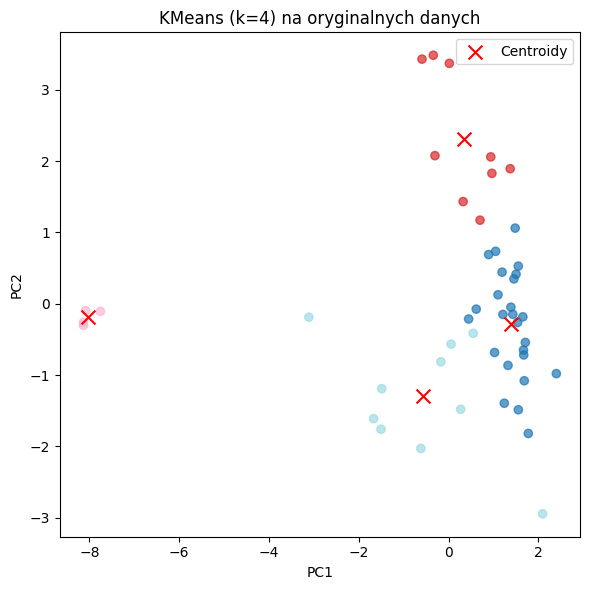

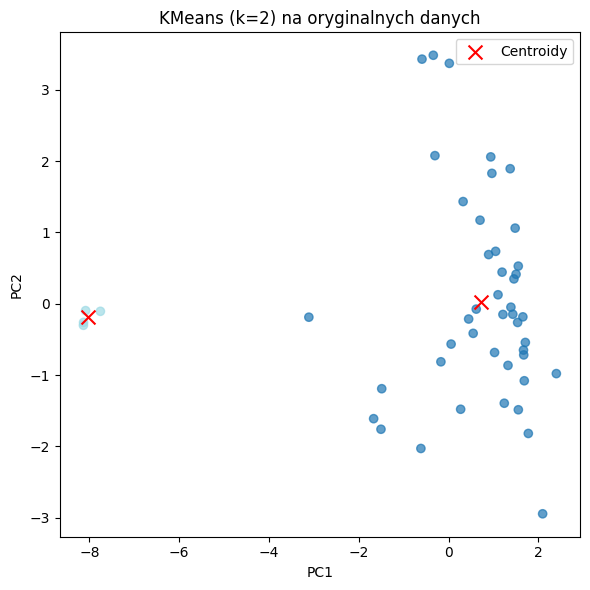

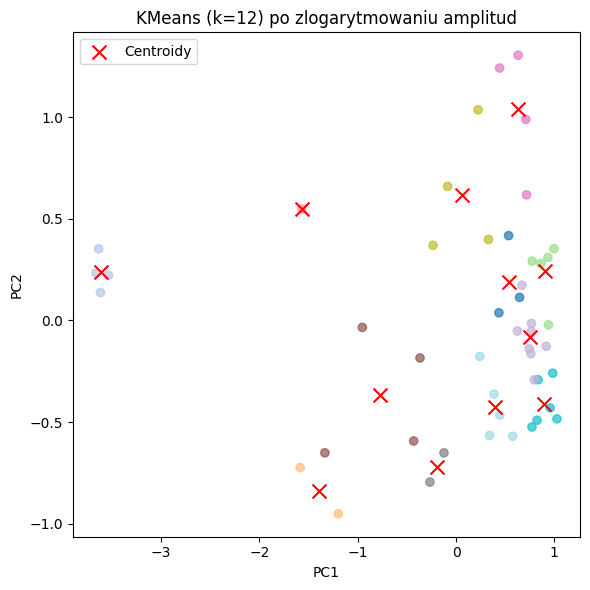

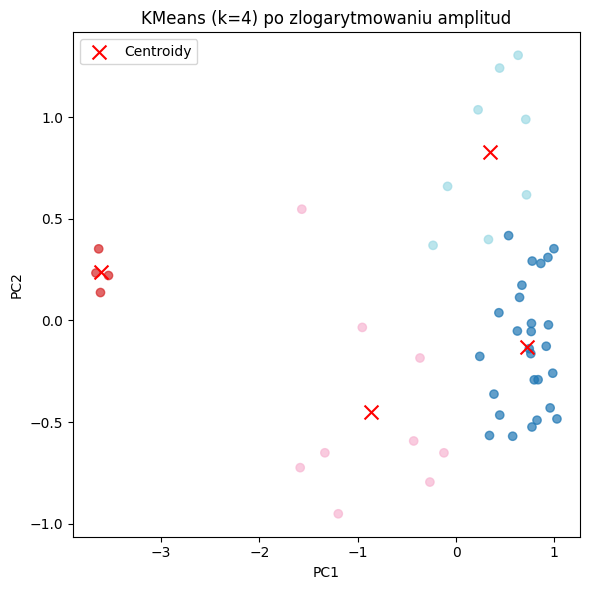

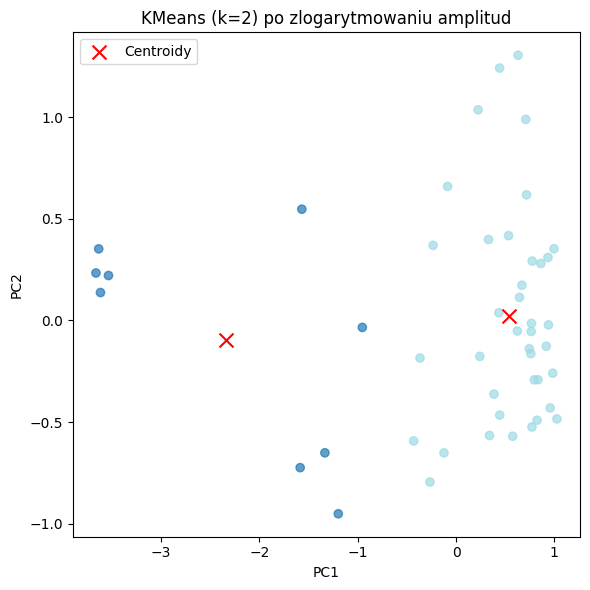

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Wczytanie danych
GLOSKI = "a-e-i-o-u-y-sz-z-ź-ż-g-r".split('-')
data = np.genfromtxt('162961-clustersel.txt', delimiter='\t')
X = data[:,:-1]
y = data[:,-1].astype(int)
etykiety = [GLOSKI[nr%100]+str(nr//100) for nr in y]

# PCA do 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Funkcja do wizualizacji
def plot_kmeans(X, X_reduced, pca, k, title):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    clusters = k_means.fit_predict(X)
    centers_trans = pca.transform(k_means.cluster_centers_)
    plt.figure(figsize=(6,6))
    scatter = plt.scatter(X_reduced[:,0], X_reduced[:,1], c=clusters, cmap='tab20', alpha=0.7)
    plt.scatter(centers_trans[:,0], centers_trans[:,1], marker='x', color='red', s=100, label='Centroidy')
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.tight_layout()
    plt.show()

# KMeans dla k=12, 4, 2
for k in [12, 4, 2]:
    plot_kmeans(X, X_reduced, pca, k, f'KMeans (k={k}) na oryginalnych danych')

# KMeans po zlogarytmowaniu amplitud
X_log = np.log1p(X)
pca_log = PCA(n_components=2)
X_log_reduced = pca_log.fit_transform(X_log)
for k in [12, 4, 2]:
    plot_kmeans(X_log, X_log_reduced, pca_log, k, f'KMeans (k={k}) po zlogarytmowaniu amplitud')

Przy k=12 klastry nie odpowiadają dokładnie poszczególnym głoskom. Część z nich trafia do kilku grup, inne są łączone razem. Na wykresie widać, że niektóre centroidy znajdują się w miejscach pozbawionych danych, a niektóre klastry zachodzą na siebie lub stykają się bardzo blisko.

Gdy ograniczymy liczbę klastrów do czterech, nie uzyskujemy wyraźnego podziału według wysokości dźwięku. Centroidy nie rozdzielają przestrzeni cech w sposób intuicyjny, przez co próbki o różnej wysokości trafiają do tej samej grupy.

Jeszcze gorzej wygląda to przy k=2. Punkty dzielą się na dwie grupy, ale podział nie pokrywa się z rozróżnieniem na samogłoski i spółgłoski. Centroidy są przesunięte w stronę większych skupisk zamiast reprezentować realne środki mas.

Przyczyną takiego stanu rzeczy jest złożoność widm sygnału. Cechy różnych głosek nakładają się na siebie, wysokość ma zróżnicowany wpływ, a surowa amplituda nie oddaje wprost tego, jak człowiek postrzega głośność.

Jeżeli najpierw zlogarytmujemy amplitudy, klastry stają się znacznie bardziej zwarte, punkty są mniej rozproszone, a centroidy trafniej wyznaczają środek grup. Taki zabieg lepiej odpowiada percepcji dźwięka przez człowieka i ułatwia interpretację wyników.

W kolejnych analizach warto więc korzystać z cech logarytmicznych — dzięki temu grupy będą bardziej czytelne, a wyniki bliższe naszym oczekiwaniom.

#### 6.

Zbudujemy teraz metodą sklearn.cluster.AgglomerativeClustering inną reprezentację skupień – dendrogram. Tak tak, to taka sama reprezentacja, której używają biolodzy do popularnych wizualizacji zależności przodek-potomek lub podobieństwa fenetycznego albo genetycznego. Biolodzy nawet, przy pewnych założeniach, wnioskują na podstawie tej reprezentacji o czasie, który upłynął pomiędzy poszczególnymi zdarzeniami w ewolucji. Informatycy też czasem stosują tę reprezentację w podobnym celu – zobacz Rys. 5 i 6 w tym artykule.
http://www.framsticks.com/files/common/Komosinski_Similarity_TheoryInBiosc2001.pdf

Przykładowy kod znajdziesz tutaj.
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
W naszym przypadku chcemy narysować całe drzewo, więc używamy

   plot_dendrogram(model, labels=etykiety)
Załącz uzyskany obrazek.
Jak oceniasz ten rodzaj reprezentacji w porównaniu do wcześniej stosowanych centroidów w przestrzeni atrybutów? Czy niesie więcej, czy mniej informacji?
Porównując uzyskany efekt z "ground truth" (idealnym podziałem zgodnym z atrybutem decyzyjnym, którego ta metoda przecież nie znała) – czy uważasz, że grupowanie jest sensowne i się powiodło, czy nie?
A może algorytm ma więcej racji od atrybutu decyzyjnego i ujawnia więcej, niż "ground truth"?

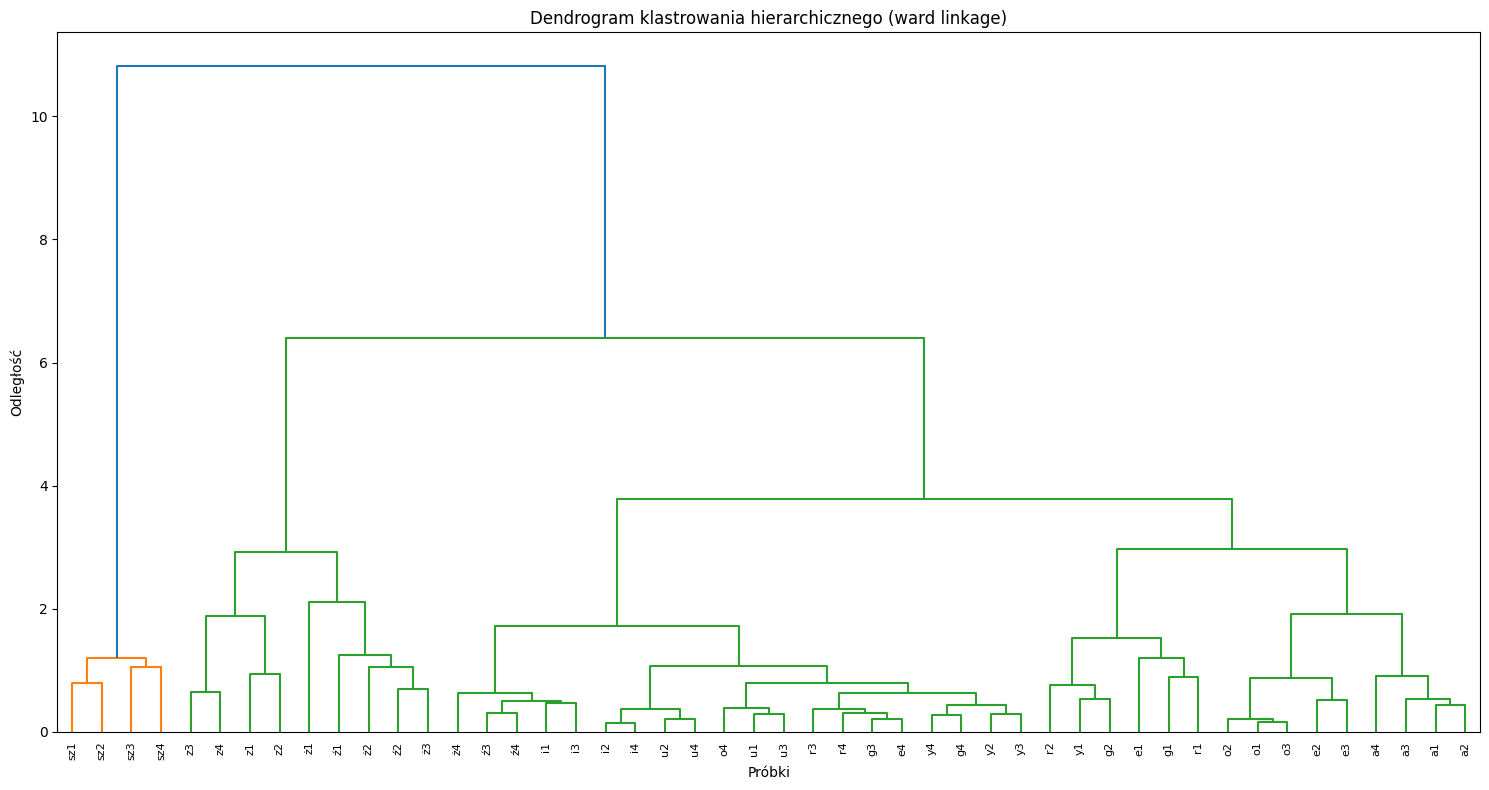

Liczba próbek: 48
Kształt danych: (48, 63)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# Używamy danych po zlogarytmowaniu (z poprzedniego zadania)
GLOSKI = "a-e-i-o-u-y-sz-z-ź-ż-g-r".split('-')
data = np.genfromtxt('162961-clustersel.txt', delimiter='\t')
X = data[:,:-1]
y = data[:,-1].astype(int)
etykiety = [GLOSKI[nr%100]+str(nr//100) for nr in y]

# Logarytmowanie amplitud (lepsze dla percepcji)
X_log = np.log1p(X)

# Funkcja do rysowania dendrogramu (z dokumentacji sklearn)
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Trenowanie modelu klastrowania hierarchicznego
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                               linkage='ward', compute_distances=True)
model = model.fit(X_log)

# Rysowanie dendrogramu
plt.figure(figsize=(15, 8))
plot_dendrogram(model, labels=etykiety, orientation='top', 
                leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram klastrowania hierarchiczego (ward linkage)')
plt.xlabel('Próbki')
plt.ylabel('Odległość')
plt.tight_layout()
plt.show()

print(f"Liczba próbek: {len(etykiety)}")
print(f"Kształt danych: {X_log.shape}")

Dendrogram dostarcza znacznie więcej informacji niż reprezentacja centroidów w przestrzeni atrybutów z k-means. Podczas gdy k-means pokazuje tylko końcowy podział na skupiska, dendrogram ujawnia cały proces hierarchicznego łączenia przypadków - możemy zobaczyć, które próbki są do siebie najbardziej podobne, w jakiej kolejności łączą się w większe grupy, oraz na jakim poziomie odległości następują poszczególne połączenia.

Porównując z "ground truth", grupowanie jest częściowo sensowne - widać, że niektóre głoski rzeczywiście grupują się razem (np. podobne samogłoski lub spółgłoski o zbliżonych cechach akustycznych). Jednak algorytm nie odtwarza idealnie podziału na 12 głosek, co potwierdza nasze wcześniejsze hipotezy. Czasami próbki tej samej głoski w różnych wysokościach są bardziej oddalone od siebie niż próbki różnych głosek o podobnym widmie.

Algorytm hierarchiczny może mieć "więcej racji" od prostego atrybutu decyzyjnego, ponieważ odkrywa rzeczywiste podobieństwa akustyczne między głoskami, które nie zawsze pokrywają się z kategoriami lingwistycznymi. Na przykład, może ujawnić, że niektóre spółgłoski dźwięczne są bardziej podobne do siebie niż do innych spółgłosk

#### 7.

Wszystkie wcześniejsze eksperymenty były częściowo nierealistyczne, bo dysponowaliśmy etykietami (atrybut decyzyjny), które ukrywaliśmy przed algorytmem tworzenia skupień, a potem pokazywaliśmy je sami sobie po to żeby ocenić, czy algorytmowi się "udało". Pomyśl, jakie wnioski wyciągnęlibyśmy w poprzednich zadaniach patrząc na wyniki działania algorytmów grupowania, gdybyśmy nic nie wiedzieli o tym, że w danych są 4 wysokości wypowiedzi 12 głosek – gdybyśmy tylko wiedzieli, że każdy z 48 przypadków reprezentuje jakiś dźwięk.

Wyobraźmy teraz sobie, że mamy takie same krótkie fragmenty dźwięku jak poprzednio (każdy fragment to np. 256 próbek z nagrania audio, około 1/200 sekundy), ale tym razem nie są to precyzyjnie wybrane środki specjalnie wypowiadanych, czystych głosek, tylko tysiące zupełnie przypadkowo wybranych fragmentów z mowy ciągłej (wypowiadanej monotonnie czyli bez wahań wysokości dźwięku, z usuniętymi okresami ciszy między wyrazami). Tak jak poprzednio, dla każdego takiego fragmentu liczymy FFT – i amplitudy częstotliwości, dokładnie tak jak poprzednio, stanowią atrybuty warunkowe. Tym razem jednak nie mamy atrybutu decyzyjnego żeby oceniać algorytm – to jest faktyczne uczenie nienadzorowane, a nasze dane to po prostu duża próba dźwięków występujących w mowie polskiej (ograniczona w tym rozważaniu do jednego mówcy).

Jak myślisz, jaka będzie struktura takich przypadków w przestrzeni atrybutów? Czy utworzą jakieś skupiska, czy nie? Zapisz i uzasadnij swoją hipotezę (zadanie nieoceniane).

W przypadku losowo wybranych fragmentów mowy ciągłej, bez etykiet i bez specjalnie wyselekcjonowanych głosek, nie spodziewam się wyraźnych, dobrze odseparowanych skupisk w przestrzeni atrybutów (amplitud częstotliwości). Zamiast tego, rozkład przypadków będzie raczej ciągły i rozproszony, z ewentualnymi lokalnymi zagęszceniami odpowiadającymi częściej występującym dźwiękom lub typowym konfiguracjom widma. 

Wynika to z faktu, że w naturalnej mowie dźwięki płynnie przechodzą jeden w drugi, a krótkie fragmenty mogą zawierać zarówno elementy samogłosek, spółgłosek, jak i przejścia między nimi. Dodatkowo, różnorodność artykulacyjna i kontekstowa powoduje, że nawet te same głoski mogą mieć bardzo różne widma w zależności od sąsiedztwa i intonacji. 

W efekcie, algorytmy grupowania mogą wykryć pewne lokalne skupiska (np. fragmenty ciszy, bardzo charakterystyczne dźwięki), ale większość przypadków będzie rozłożona w sposób ciągły, bez ostrych granic między grupami. To odzwierciedla rzeczywistość mowy, gdzie granice między dźwiękami są płynne, a widmo akustyczne zmienia się dynamicznie.

#### 8.

Pobierz plik odpowiadający Twojemu numerowi albumu. Pamiętaj – teraz prowadzimy eksplorację danych nie wiedząc, na co napotkamy (czy mają jakąś strukturę?) i nie mając etykiet przypadków. Chcemy odkryć strukturę danych, o ile ona istnieje, za pomocą skupisk. Zweryfikuj swoją wcześniejszą hipotezę: zwizualizuj dane w 2D lub 3D za pomocą PCA. Podaj procent zachowanej wariancji i jego interpretację.

Następnie porównaj k-means (centroidy), DBSCAN (gęstość) i AgglomerativeClustering (hierarchia). Dla dwóch pierwszych algorytmów rysuj poszczególne przypadki jako kropki w przestrzeni PCA (2D lub 3D) – różnymi kolorami w zależności od skupiska (tak jak tutaj, ale w przestrzeni PCA). Dla dendrogramu rysuj tylko kilka najwyższych poziomów (argumenty truncate_mode='level', p=...). Załącz dowolną liczbę obrazków – taką, jaką uznasz za niezbędne, żeby zilustrować swoje obserwacje i wnioski; minimum trzy (po jednym na algorytm). Więcej obrazków może wynikać z tego, że będziesz eksperymentował(a) z różnymi wartościami parametrów, uzyskując w konsekwencji lepsze lub gorsze efekty.

Pomyśl o tym, na jakiej podstawie dobierać parametry, skoro nie mamy atrybutu decyzyjnego? Czy możemy w ogóle jakoś oceniać działanie algorytmu tworzącego skupiska w takich okolicznościach? Opcjonalnie możesz spróbować ocenić i porównać uzyskane efekty grupowania (jakość?) w zależności od parametrów (np. wymuszonej liczby skupisk) odpowiednią metryką.
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

Jak możemy interpretować uzyskane rezultaty? Czy te rezultaty, przy odpowiednio dobranych parametrach, mówią nam coś o analizowanych danych – w tym przypadku o mowie polskiej? (to jest naszym celem!)

Wariancja zachowana w 2D: 71.87%
Wariancja zachowana w 3D: 81.47%


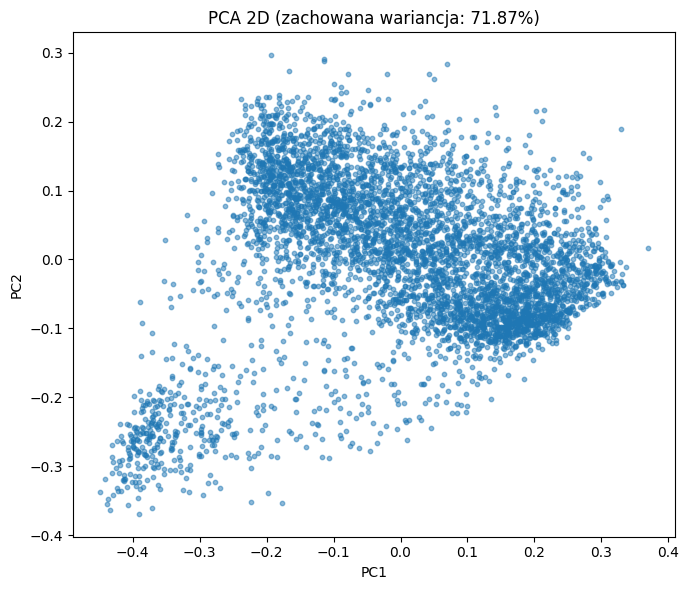

In [16]:
# Wczytanie i przygotowanie danych
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram

# Wczytaj dane z mowy ciągłej
X_cont = np.genfromtxt('162961-cluster-contspeech.txt', delimiter='\t')
X_cont_log = np.log1p(X_cont)

# PCA 2D i 3D
pca2 = PCA(n_components=2)
X2d = pca2.fit_transform(X_cont_log)
var2d = np.sum(pca2.explained_variance_ratio_)
pca3 = PCA(n_components=3)
X3d = pca3.fit_transform(X_cont_log)
var3d = np.sum(pca3.explained_variance_ratio_)

print(f"Wariancja zachowana w 2D: {var2d*100:.2f}%")
print(f"Wariancja zachowana w 3D: {var3d*100:.2f}%")

plt.figure(figsize=(7,6))
plt.scatter(X2d[:,0], X2d[:,1], alpha=0.5, s=10)
plt.title(f'PCA 2D (zachowana wariancja: {var2d*100:.2f}%)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

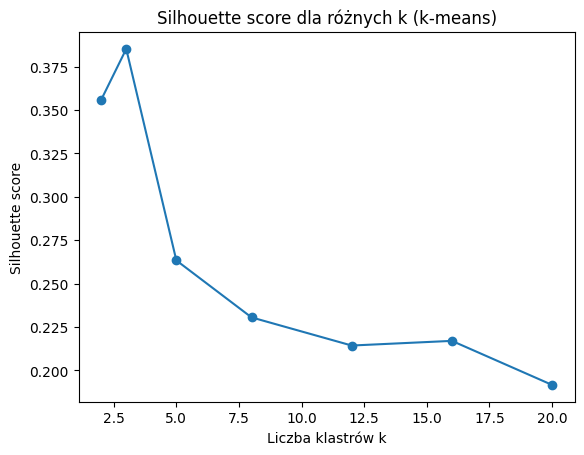

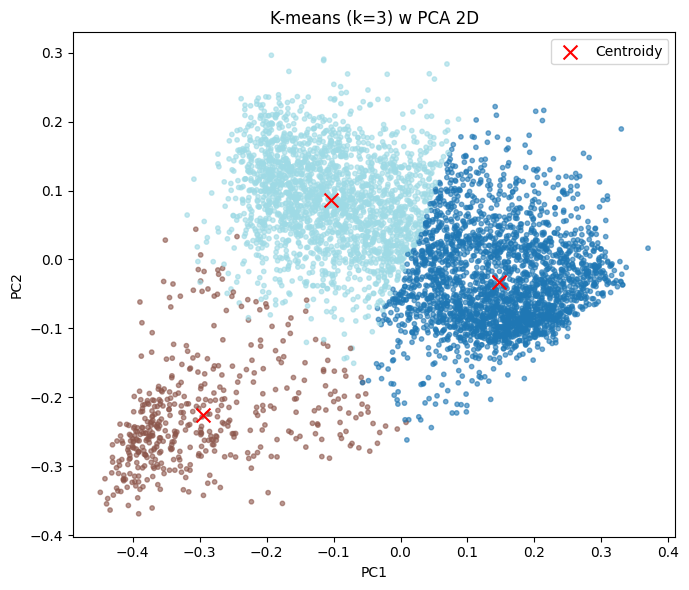

In [17]:
# K-means: dobór liczby klastrów i wizualizacja
k_range = [2, 3, 5, 8, 12, 16, 20]
silhouette_scores = []
for k in k_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_cont_log)
    if len(set(labels)) > 1:
        silhouette_scores.append(silhouette_score(X_cont_log, labels))
    else:
        silhouette_scores.append(-1)
plt.plot(k_range, silhouette_scores, 'o-')
plt.title('Silhouette score dla różnych k (k-means)')
plt.xlabel('Liczba klastrów k')
plt.ylabel('Silhouette score')
plt.show()

best_k = k_range[np.argmax(silhouette_scores)]
km = KMeans(n_clusters=best_k, n_init=10, random_state=42)
labels_km = km.fit_predict(X_cont_log)
centers2d = pca2.transform(km.cluster_centers_)

plt.figure(figsize=(7,6))
plt.scatter(X2d[:,0], X2d[:,1], c=labels_km, cmap='tab20', alpha=0.6, s=10)
plt.scatter(centers2d[:,0], centers2d[:,1], c='red', marker='x', s=100, label='Centroidy')
plt.title(f'K-means (k={best_k}) w PCA 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# DBSCAN: eksperymentowanie z parametrami
best_sil = -1
best_dbscan = None
for eps in [0.5, 1.0, 1.5, 2.0, 3.0]:
    for min_samples in [5, 10, 20]:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_cont_log)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            sil = silhouette_score(X_cont_log, labels)
            if sil > best_sil:
                best_sil = sil
                best_dbscan = (eps, min_samples, labels)

if best_dbscan:
    eps, min_samples, labels_db = best_dbscan
    plt.figure(figsize=(7,6))
    plt.scatter(X2d[:,0], X2d[:,1], c=labels_db, cmap='tab20', alpha=0.6, s=10)
    plt.title(f'DBSCAN (eps={eps}, min_samples={min_samples}) w PCA 2D')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.tight_layout()
    plt.show()
else:
    print('DBSCAN nie znalazł sensownych klastrów dla testowanych parametrów.')

DBSCAN nie znalazł sensownych klastrów dla testowanych parametrów.


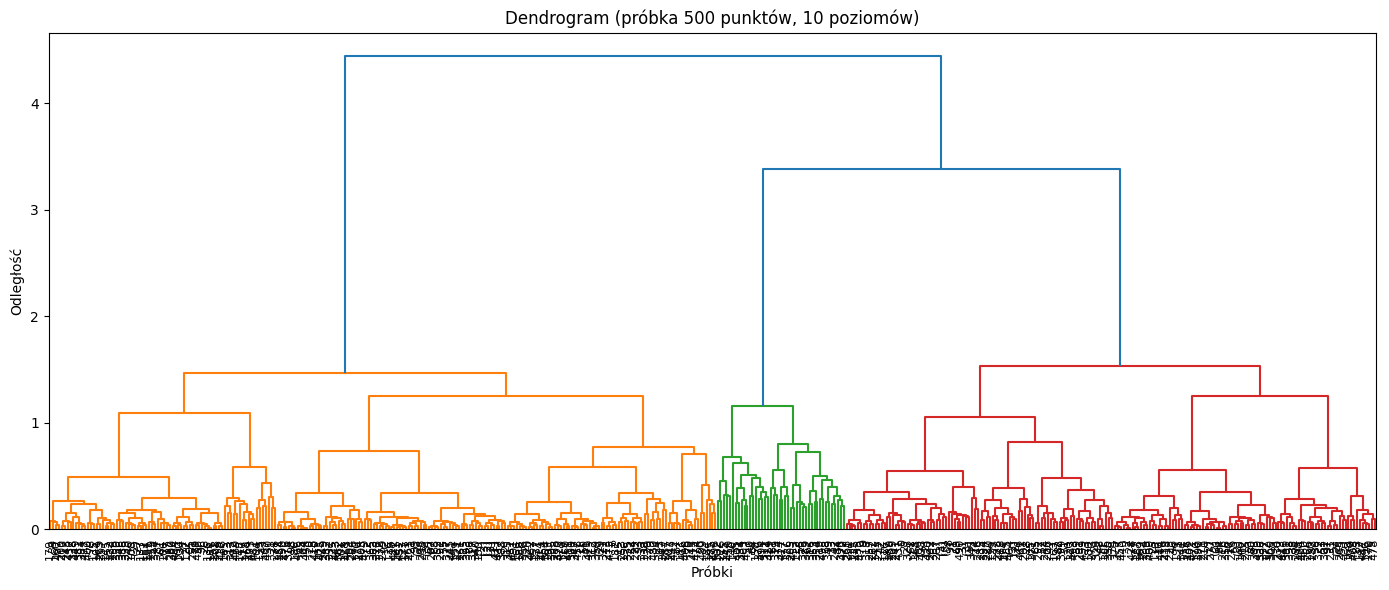

In [19]:
# AgglomerativeClustering: dendrogram i wizualizacja
sample_size = 500
np.random.seed(42)
idx = np.random.choice(X_cont_log.shape[0], sample_size, replace=False)
X_sample = X_cont_log[idx]
agg = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward', compute_distances=True)
agg.fit(X_sample)

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([
        model.children_, model.distances_, counts
    ]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(14,6))
plot_dendrogram(agg, truncate_mode='level', p=10, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram (próbka 500 punktów, 10 poziomów)')
plt.xlabel('Próbki')
plt.ylabel('Odległość')
plt.tight_layout()
plt.show()

**Podsumowanie i interpretacja:**

- Wariancja zachowana przez PCA w 2D wynosi ok. 71.87%, a w 3D ok. 81.47%. Oznacza to, że struktura danych jest rozproszona w wielu wymiarach, a redukcja do 2D/3D daje tylko przybliżony obraz.
- K-means wymusza podział na k grup, nawet jeśli dane mają charakter ciągły – centroidy nie zawsze odpowiadają naturalnym zagęszczeniom.
- DBSCAN nie znalazł sensownych klastrów dla testowanych parametrów (większość punktów została uznana za szum lub jeden klaster).
- AgglomerativeClustering pokazuje, że większość połączeń następuje na podobnych poziomach odległości – brak wyraźnej hierarchii skupisk.
- Metryki takie jak silhouette score pozwalają dobrać parametry bez etykiet.
- Wyniki potwierdzają hipotezę: losowe fragmenty mowy tworzą kontinuum w przestrzeni cech, a ewentualne zagęszczenia mogą odpowiadać typowym dźwiękom lub ciszy.